In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from mpi4py import MPI

In [8]:
comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

In [9]:
def f(x):
    return 1/(1 + x**2)

def integ(a, b):
    return (np.arctan(b) - np.arctan(a))

def trapz(f, a, b, n_points = 1):
    
    dx = (b - a)/n_points
    ans = 1/2 * (f(a) + f(b))
    
    for i in range(1, int(n_points)):
        ans += f(a + i*dx)     
    return ans*dx

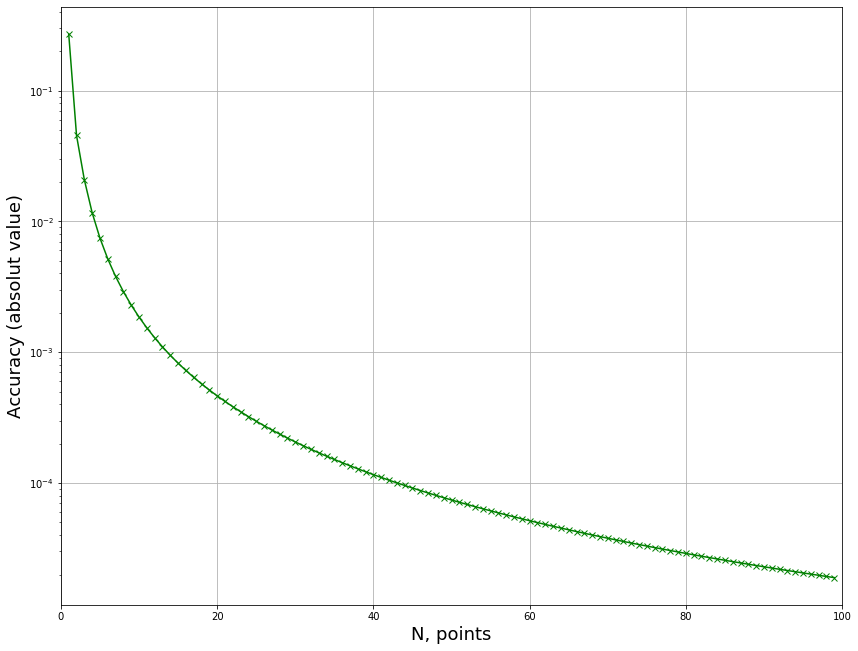

In [10]:
# check accuracy
a = -pi/4
b = pi/4
max_points= 100

n_points = list(range(1, int(max_points)))
accuracies = []
for i in n_points:
    accuracy = abs((integ(a, b) - trapz(f, a, b, i))/integ(a, b))
    accuracies.append(accuracy)
    
plt.figure(figsize=(14, 11))
plt.plot(n_points[:60581], accuracies, 'x-', color = 'g')
plt.xlim(0, 100)
plt.xlabel('N, points', fontsize = 18)
plt.ylabel('Accuracy (absolut value)', fontsize = 18)
#plt.xlim(0, 60)
plt.yscale('log')
plt.grid(True)

plt.show()

In [28]:
l = []
with open('time_7.txt') as f:
    l = f.read().splitlines()
result = [float(l[0])/float(i) for i in l]

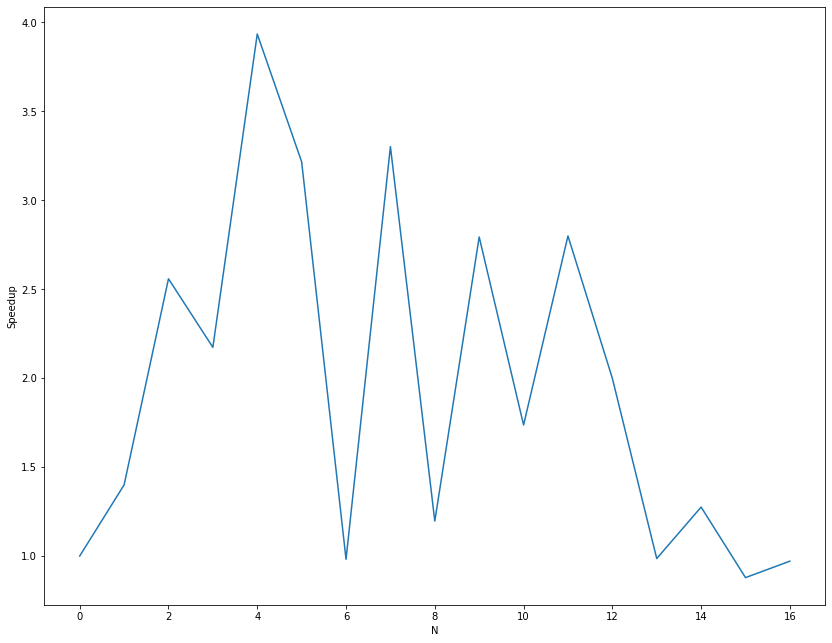

In [29]:
plt.figure(figsize = (14,11))
plt.plot(range(len(result)),result)
plt.ylabel('Speedup')
plt.xlabel('N')
plt.show()

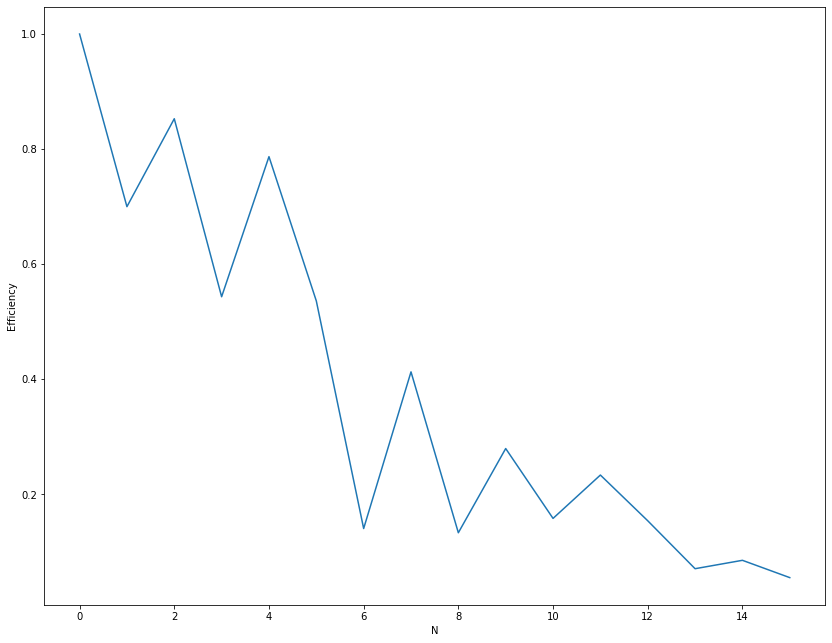

In [30]:
ef = [result[i]/(i+1) for i in range(len(result)-1)]
plt.figure(figsize = (14,11))
plt.plot(range(len(ef)),ef)
plt.ylabel('Efficiency')
plt.xlabel('N')
plt.show()